<a href="https://colab.research.google.com/github/srinijasriram/2216166_AIML_BootCamp_2023/blob/main/MULTI_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/50_Startups.csv")

In [ ]:
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [ ]:
print(df.isnull().any())

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool


In [ ]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


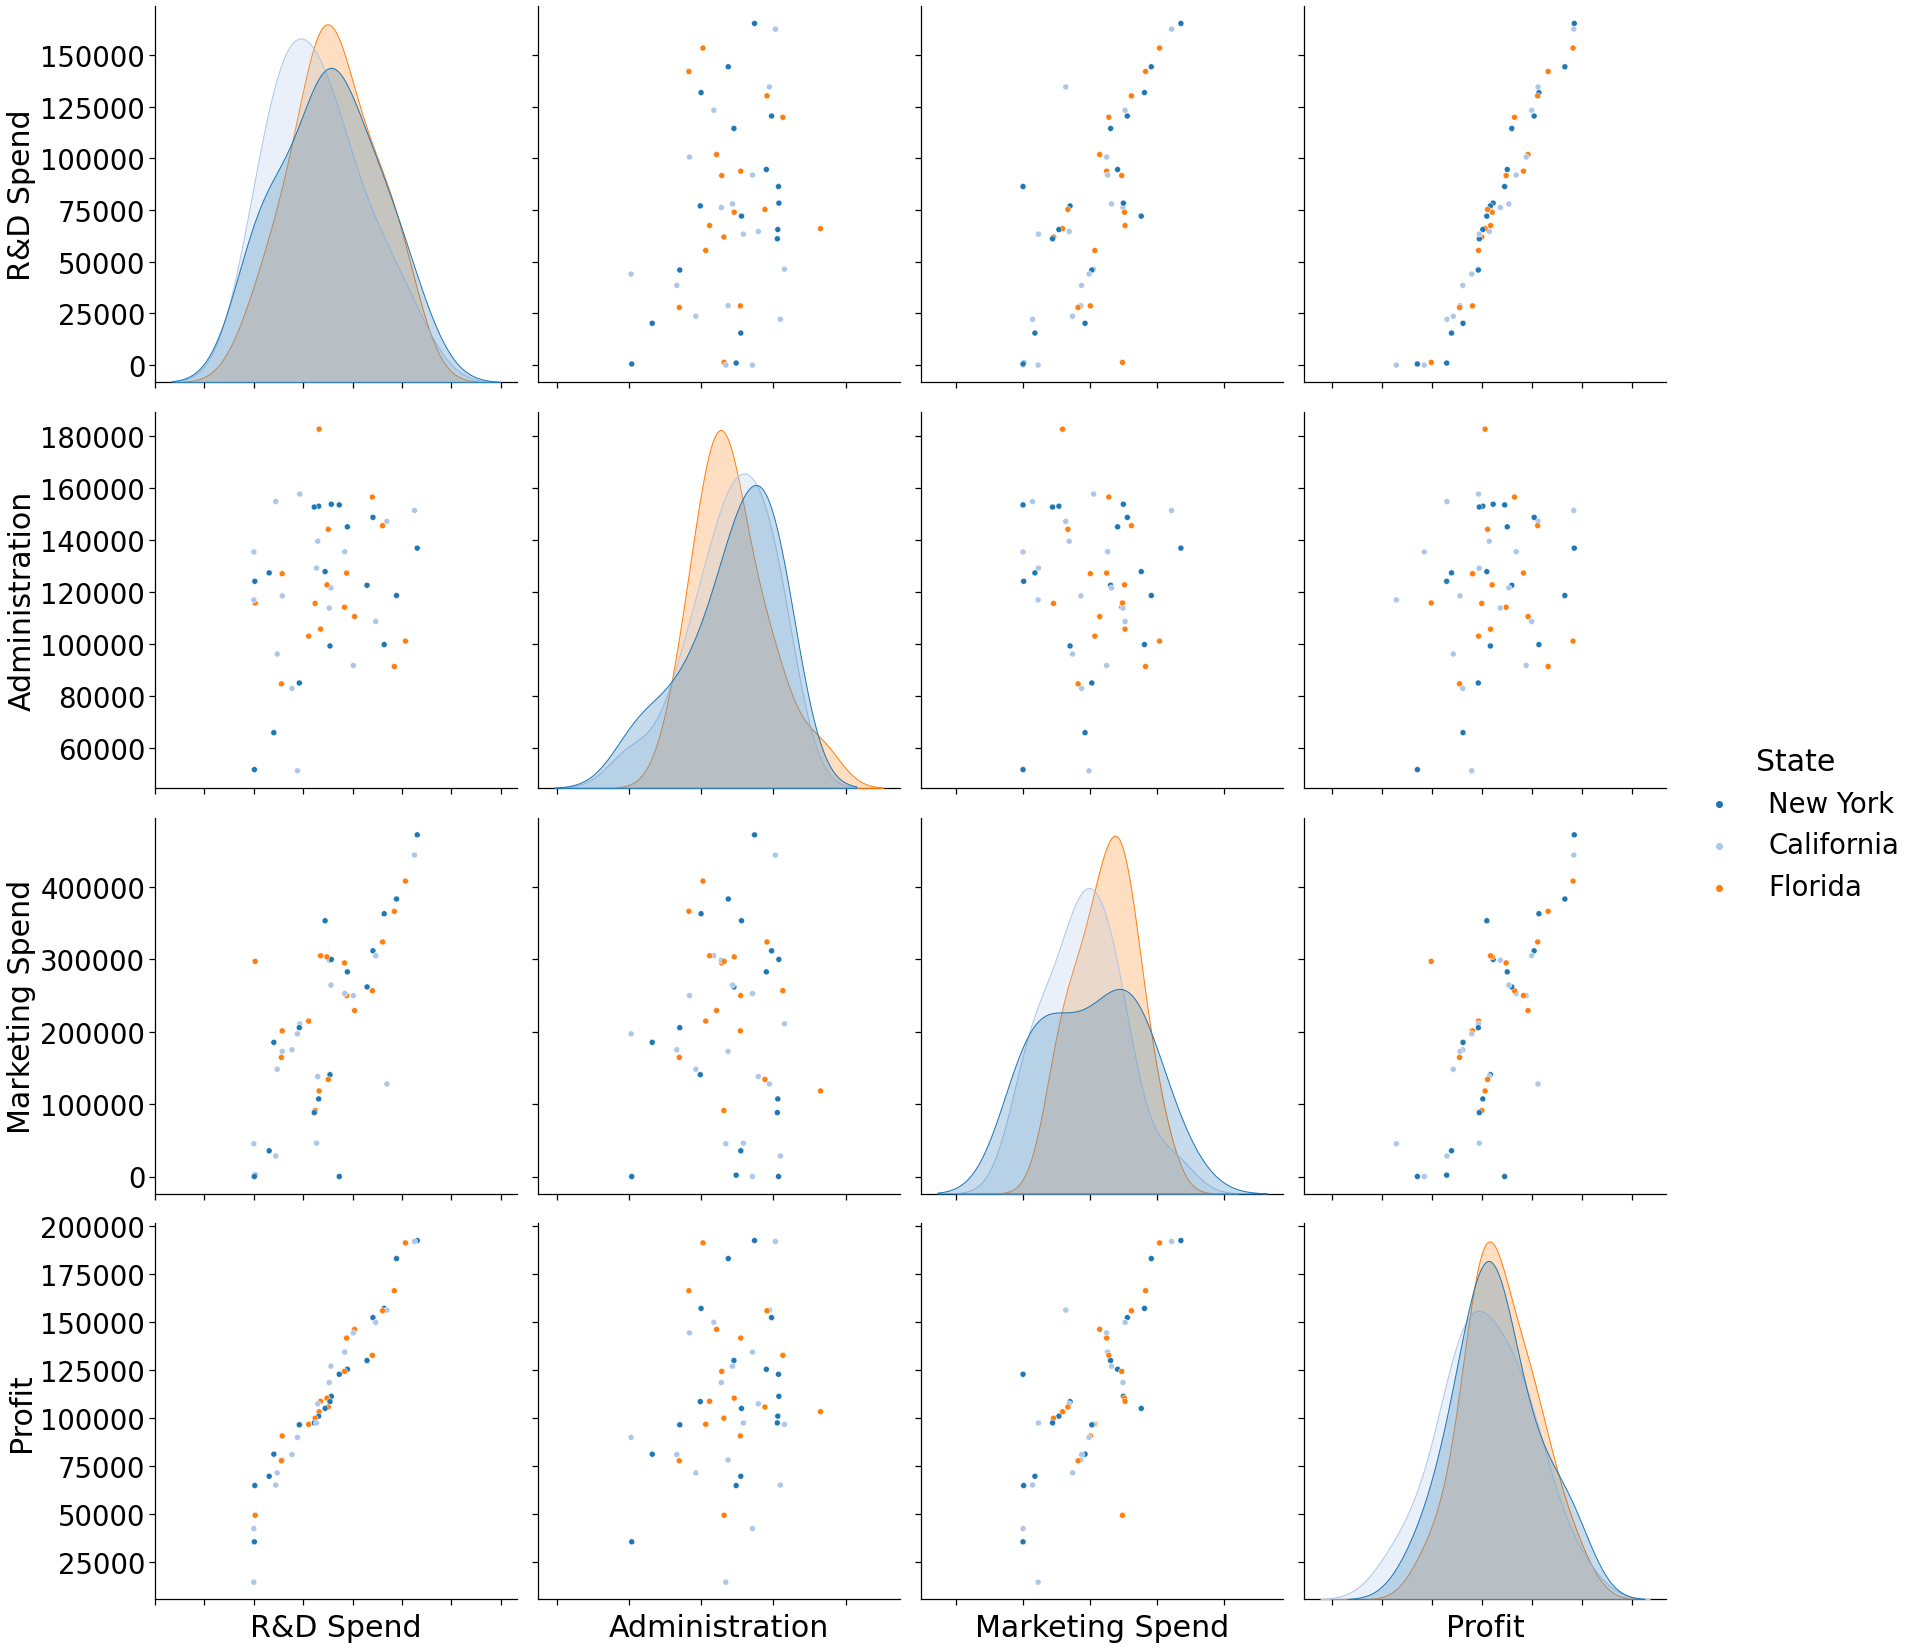

In [ ]:
#understanding dataset
with sns.plotting_context('notebook',font_scale=2.5):
  g=sns.pairplot(df[['R&D Spend',  'Administration',  'Marketing Spend', 'State','Profit']],hue='State',palette='tab20',size=6)
g.set(xticklabels=[])

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [ ]:
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


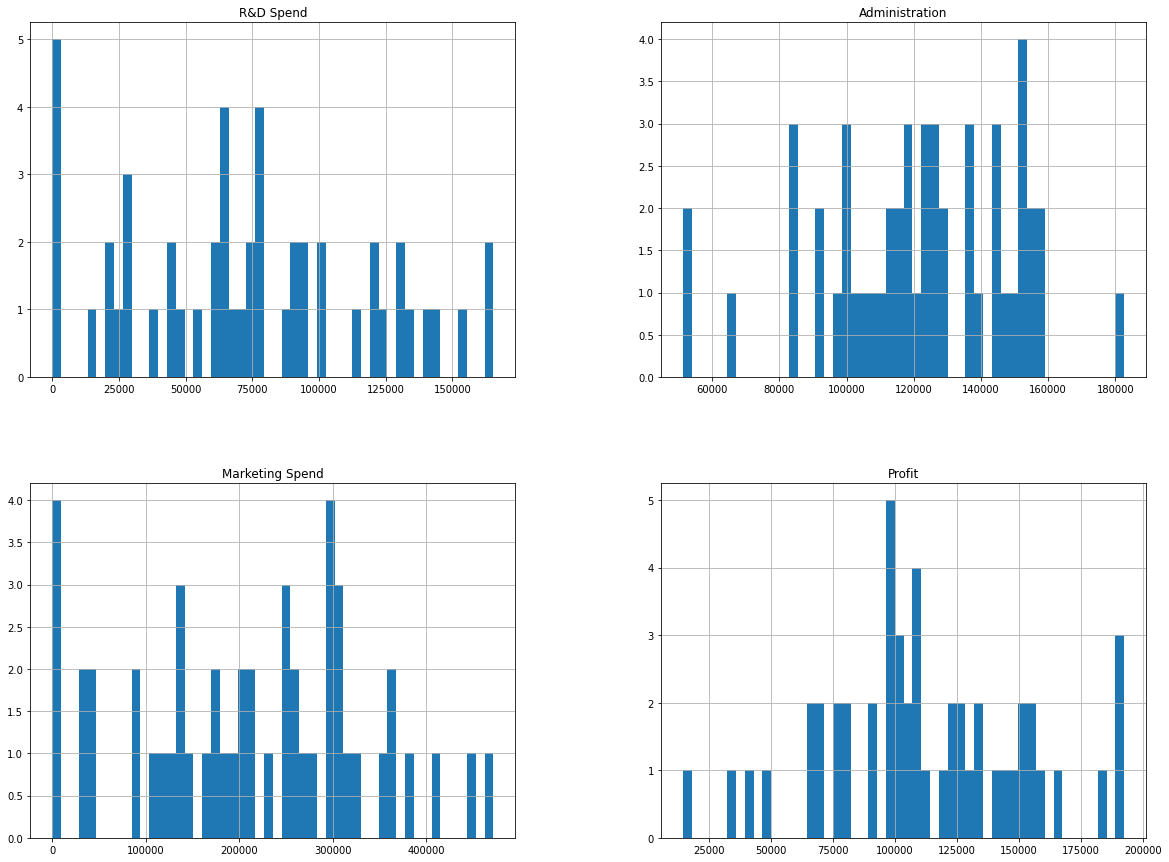

In [ ]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:>

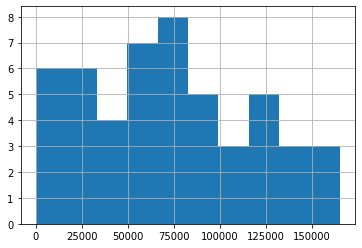

In [ ]:
df['R&D Spend'].hist()

<AxesSubplot:>

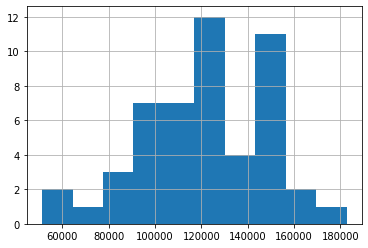

In [ ]:
df['Administration'].hist()

<AxesSubplot:>

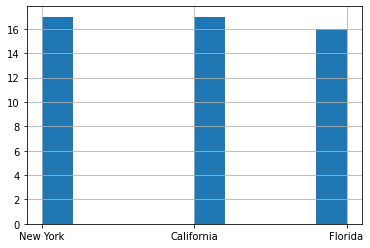

In [ ]:
df['State'].hist()

<AxesSubplot:>

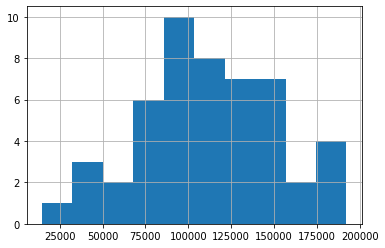

In [ ]:
df['Profit'].hist()

In [ ]:
from sklearn.compose import ColumnTransformer
from  sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.00e+00 0.00e+00 1.00e+00 1.65e+05 1.37e+05 4.72e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.63e+05 1.51e+05 4.44e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.53e+05 1.01e+05 4.08e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.44e+05 1.19e+05 3.83e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.42e+05 9.14e+04 3.66e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.32e+05 9.98e+04 3.63e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.35e+05 1.47e+05 1.28e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.30e+05 1.46e+05 3.24e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.21e+05 1.49e+05 3.12e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.23e+05 1.09e+05 3.05e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.02e+05 1.11e+05 2.29e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.01e+05 9.18e+04 2.50e+05]
 [0.00e+00 1.00e+00 0.00e+00 9.39e+04 1.27e+05 2.50e+05]
 [1.00e+00 0.00e+00 0.00e+00 9.20e+04 1.35e+05 2.53e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.20e+05 1.57e+05 2.57e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.15e+05 1.23e+05 2.62e+05]
 [1.00e+00 0.00e+00 0.00e+00 7.80e+04 1.22e+05 2.64e+05]
 [0.00e+00 0.00e+00 1.00e+00 9.

SPLITTING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2 ,random_state = 0)

TRAINING MULTIPLE REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

PREDECTION

In [ ]:
y_pred=r.predict(x_test)
np.set_printoptions(precision=2)
t1=y_pred.reshape(len(y_pred),1)
t2=y_test.reshape(len(y_test),1)

In [ ]:
y_pred=r.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
